In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stats_dir = '../stats'
vis_dir = '../visualisations'
if not os.path.exists(vis_dir):
    os.makedirs(vis_dir)

In [3]:
gan_stats = pd.read_csv(os.path.join(stats_dir, 'gan_train_stats.csv'))
resnet_stats = pd.read_csv(os.path.join(stats_dir, 'resnet_train_stats.csv'))
unet_stats = pd.read_csv(os.path.join(stats_dir, 'unet_train_stats.csv'))

In [4]:
def plot_GAN_MSE(model, val_loss, removeFirstEpoch=False, showArrow=False, showLegend=False):
    
    if removeFirstEpoch:
        val_loss = val_loss[1:]
    
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(111)
    ax1.set_title(model, fontsize=26)

    ax1.set_xlabel('Epoch', fontsize=22)
    ax1.set_ylabel('MSE', fontsize=22)

    color = 'tab:blue'
    ax1.plot(np.arange(0, len(val_loss)), val_loss, color=color,
            linewidth=3, label='Validation Loss')
    
    min_val_loss = round(np.amin(val_loss), 5)
    epoch_min_val_loss = np.argmin(val_loss)
    
    if showLegend:
        ax1.legend(loc='upper right')
    
    if showArrow:
        ax1.annotate('min val loss = {} (epoch {})'.format(min_val_loss, epoch_min_val_loss),
                    xy=(epoch_min_val_loss, min_val_loss),
                    arrowprops=dict(facecolor='black', shrink=0.15),
                    xytext=(epoch_min_val_loss - 20, min_val_loss + 0.0004),
                    fontsize=22)
    
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    
    fig.tight_layout()
    plt.savefig(os.path.join(vis_dir, '{}_train_val_loss.pdf'.format(model)), format='pdf')
    plt.show()

In [5]:
resnet_epochs = resnet_stats.epoch
resnet_train_loss = resnet_stats.train_loss
resnet_val_loss = resnet_stats.val_loss

In [6]:
unet_epochs = unet_stats.epoch
unet_train_loss = unet_stats.train_loss
unet_val_loss = unet_stats.val_loss

In [7]:
gan_stats.head()

,epoch,train_time,train_loss_D,train_loss_D_real,train_loss_D_generated,train_loss_G,train_loss_G_GAN,train_loss_G_generated,val_loss_D,val_loss_G,val_loss_MSE
0,0,2332.961094,4.364226,3.702515,0.661711,20.620539,20.620539,15.064346,4.018376,12.333835,0.033028
1,1,2318.393411,0.775340,0.589366,0.185974,16.149208,16.149208,12.655368,2.272842,13.008631,0.033325
2,2,2328.334459,0.720128,0.542189,0.177938,16.232963,16.232963,12.652124,1.782431,14.344396,0.042067
3,3,2322.169192,0.801871,0.575652,0.226219,15.699895,15.699895,12.926814,2.236577,13.904090,0.040241
4,4,2360.158571,0.808653,0.576355,0.232298,15.297871,15.297871,12.794146,1.537403,12.816555,0.033613


In [8]:
gan_val_mse_loss = gan_stats.val_loss_MSE
gan_train_loss_D = gan_stats.train_loss_D
gan_train_loss_G = gan_stats.train_loss_G
gan_val_loss_D = gan_stats.val_loss_D
gan_val_loss_G = gan_stats.val_loss_G

In [9]:
def plot_val_train_MSE(model, train_loss, val_loss, removeFirstEpoch=False, showArrow=False, max_epochs=100):
    train_loss = train_loss[:max_epochs]
    val_loss = val_loss[:max_epochs]
    
    if removeFirstEpoch:
        train_loss = train_loss[1:]
        val_loss = val_loss[1:]
    
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(111)
    ax1.set_title(model, fontsize=24)

    ax1.set_xlabel('Epoch', fontsize=20)
    ax1.set_ylabel('MSE', fontsize=20)

    color = 'tab:orange'
    ax1.plot(np.arange(0, len(train_loss)), train_loss, color=color,
            linewidth=3, label='Training Loss')

    color = 'tab:blue'
    ax1.plot(np.arange(0, len(val_loss)), val_loss, color=color,
            linewidth=3, label='Validation Loss')
    
    min_val_loss = round(np.amin(val_loss), 5)
    epoch_min_val_loss = np.argmin(val_loss)
    
    ax1.legend(loc='upper right', fontsize=16)
    
    ax1.annotate('min val loss = {} (epoch {})'.format(min_val_loss, epoch_min_val_loss),
                xy=(epoch_min_val_loss, min_val_loss),
                arrowprops=dict(facecolor='black', shrink=0.12),
                xytext=(epoch_min_val_loss - 52, min_val_loss + 0.0004), fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    
    fig.tight_layout()
    plt.savefig(os.path.join(vis_dir, '{}_train_val_loss.pdf'.format(model)), format='pdf')
    plt.show()

/Users/abdel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


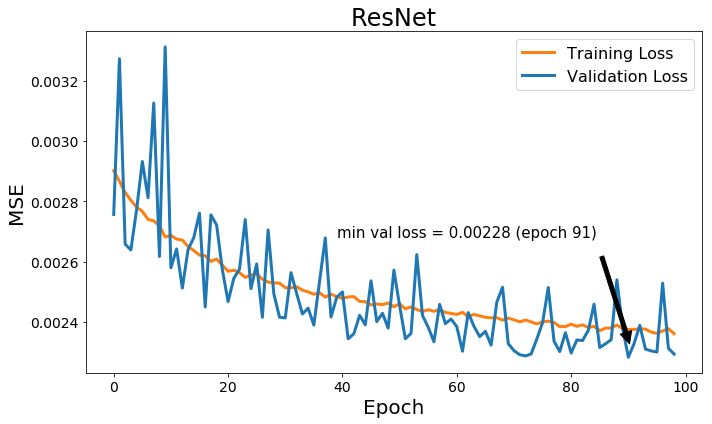

In [10]:
plot_val_train_MSE('ResNet', resnet_train_loss, resnet_val_loss, True, True)

/Users/abdel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


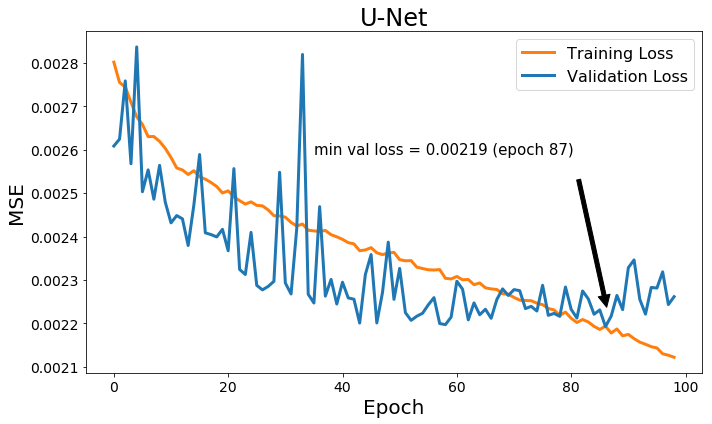

In [11]:
plot_val_train_MSE('U-Net', unet_train_loss, unet_val_loss, True)

/Users/abdel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


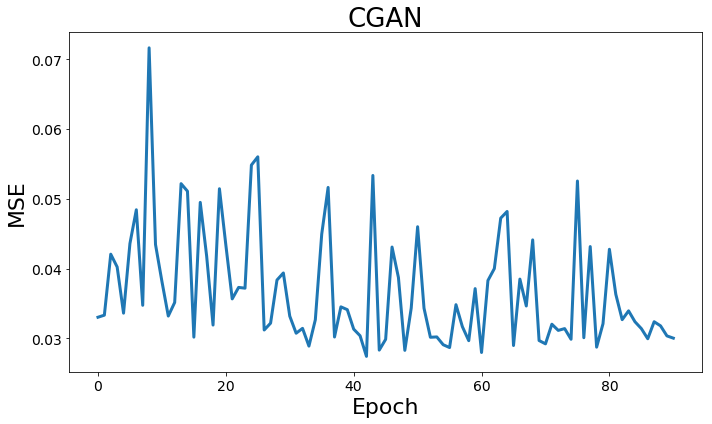

In [12]:
plot_GAN_MSE('CGAN', gan_val_mse_loss)

In [13]:
def plot_val_train_GAN(model, train_loss, val_loss, mse_loss, removeFirstEpoch=False, showArrow=False, loss='Generator', truncate_epochs=100):
    
    train_loss = train_loss[:truncate_epochs]
    val_loss = val_loss[:truncate_epochs]
    
    if removeFirstEpoch:
        train_loss = train_loss[1:]
        val_loss = val_loss[1:]
    
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(111)
    ax1.set_title(model, fontsize=24)

    ax1.set_xlabel('Epoch', fontsize=16)
    ax1.set_ylabel('{} loss'.format(loss), fontsize=16)

    color = 'tab:orange'
    ax1.plot(np.arange(0, len(train_loss)), train_loss, color=color,
            linewidth=3, label='Training GAN Loss')

    color = 'tab:blue'
    ax1.plot(np.arange(0, len(val_loss)), val_loss, color=color,
            linewidth=3, label='Validation GAN Loss')
    
    min_val_loss = round(np.amin(val_loss), 5)
    epoch_min_val_loss = np.argmin(val_loss)
    
    ax1.legend(loc='upper right', fontsize=14)
    
    ax1.annotate('min val loss = {} (epoch {})'.format(min_val_loss, epoch_min_val_loss),
                xy=(epoch_min_val_loss, min_val_loss),
                arrowprops=dict(facecolor='black', shrink=0.03),
                xytext=(epoch_min_val_loss - 14, min_val_loss + 5.8), fontsize=14)
    
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.tick_params(axis='both', which='minor', labelsize=14)
    
    fig.tight_layout()
    plt.savefig(os.path.join(vis_dir, '{}_train_val_loss.pdf'.format(model)), format='pdf')
    plt.show()

/Users/abdel/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


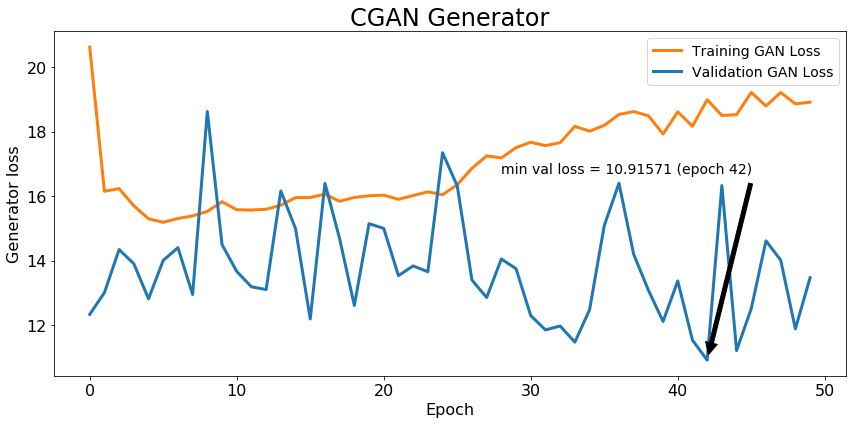

In [14]:
plot_val_train_GAN('CGAN Generator', gan_train_loss_G, gan_val_loss_G, gan_val_mse_loss,
                   removeFirstEpoch=False, showArrow=False, truncate_epochs=50)